In [2]:
#Using the time-independent Schrödinger equation to find the eigenfunctions (wavefunctions) and energy levels of a 
#particle in an infinite potential well. 

#Firstly, import various libraries, which will later be used
import numpy as np
import matplotlib.pyplot as plt

In [3]:
a0 = 52.92 * 10**(-12) #the first Bohr radius
A = 1 / np.sqrt(np.pi * (a0**3)) #useful constant which regularly features in wavefunctions

L = 15*a0 #max radial distance at which the wavefunction is sampled (change depending on state)

In [4]:
def solution(n, l, m_l, r):
    """
    Function to define the wavefunction for the electron in a hydrogen atom at a given point in space and 
    for a specific quantum state
    
    Returns:
        psi : float
              the value of the wavefunction
              
    Parameters:
        n : integer
            principal quantum number
        
        l : integer
            angular quantum number
            
        m_l : integer
              magnetic quantum number
        
        r : float
            radial distance
    """
    
    #series of 'if' statements to establish the quantum state and the corresponding wavefunction
    
    if n == 1:
        if l == 0 and m_l == 0: 
            psi = A * np.exp(-r / a0) #wavefunction for the 1s state
            return psi
        
        else:
            print("The quantum state with n =", n, ", l =", l, "and m_l =", m_l, "does not exist.")
            
    if n == 2:
        if l == 0 and m_l == 0:
            psi = (1/4) * A * (2 - (r / a0)) * np.exp(-r / (2 * a0)) #wavefunction for the 2s state
            return psi

In [5]:
def wavefunction(n, l, m_l):
    """
    Function to define the wavefunction function for the electron in a hydrogen atom at a given point in space and 
    for a specific quantum state
    
    Returns:
        psi : array
              the wavefunction function
              
    Parameters:
        n : integer
            principal quantum number
        
        l : integer
            angular quantum number
            
        m_l : integer
              magnetic quantum number
    """
    if (n == 1 and l == 0 and m_l == 0) or (n == 2 and l == 0 and m_l == 0): #only have 1s and 2s states at the moment
        psi = [] #create an empty array in which to store wavefunction values
    
        for r in np.arange(0, L, L / 1000):
            psi = np.append(psi, solution(n, l, m_l, r)) #calculate wavefunction at regular position intervals
        
        return psi
    
    elif l == 1 and (m_l == -1 or m_l == 0 or m_l == 1):
        print("The quantum state with n =", n, ", l =", l, "and m_l =", m_l, "requires an angular component.")

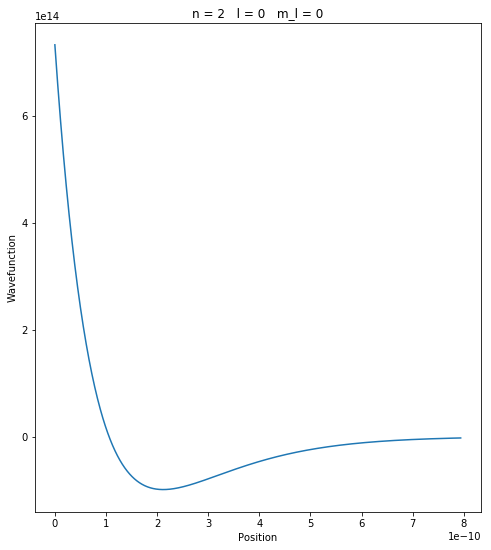

In [23]:
n = 2; l = 0; m_l = 0 #set the quantum numbers

r_pos = np.linspace(0, L, 1000) #array filled with radial position values

#set the size of the figures
fig = plt.figure(figsize = (8, 9))

#plot wavefunction against position with relevant title and axes labels
plt.plot(r_pos, wavefunction(n, l, m_l))
plt.xlabel('Position')
plt.ylabel('Wavefunction')
plt.title("n = %i   l = %i   m_l = %i" % (n, l, m_l))

plt.show()